In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import random

In [197]:
df = pd.read_csv("Life_Expectancy_Data.csv")

In [198]:
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

# Statistical information

In [200]:
df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Check if exists duplicated values

In [201]:
#see how many duplicated values exists
print("Duplicated values: ", df.duplicated().sum())

Duplicated values:  0


# Check how columns are categorical or numerical

In [202]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country', 'Status'], dtype='object')


# One hot encoding to convert categorial column by numerical

In [203]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Status'.
df['Status']= label_encoder.fit_transform(df['Status'])
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Check how many missing values exists in each column

In [204]:
print(df.isna().sum())

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64


# Replace all missing elements with the median of the column

In [207]:
df_without_Nas = df.fillna(df.median())

In [208]:
print(df_without_Nas.isna().sum())

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64


# Check the target distribution

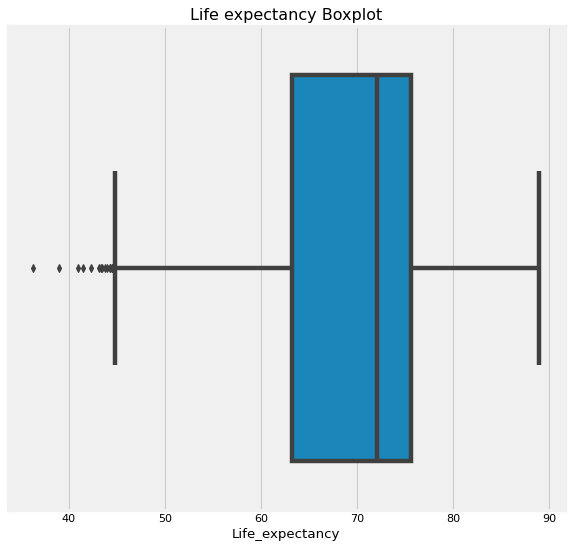

In [210]:
# Let's check the distribution of y variable (Life Expectancy)
plt.figure(figsize=(8,8), dpi= 80)
sns.boxplot(df_without_Nas['Life_expectancy'])
plt.title('Life expectancy Boxplot')
plt.show()

[]

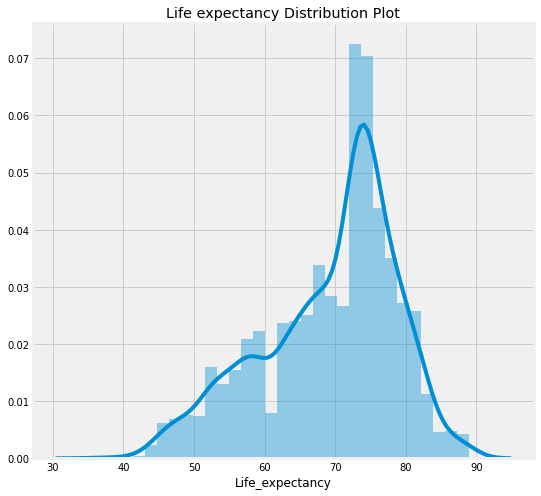

In [211]:
plt.figure(figsize=(8,8))
plt.title('Life expectancy Distribution Plot')
sns.distplot(df_without_Nas['Life_expectancy'])
plt.plot()

In [212]:
df_without_Nas = df_without_Nas.drop(columns=['Country'])
df_without_Nas

,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Remove outliers by z-score

In [213]:
from scipy import stats
df_without_outliers = df_without_Nas[(np.abs(stats.zscore(df_without_Nas)) < 3).all(axis=1)]

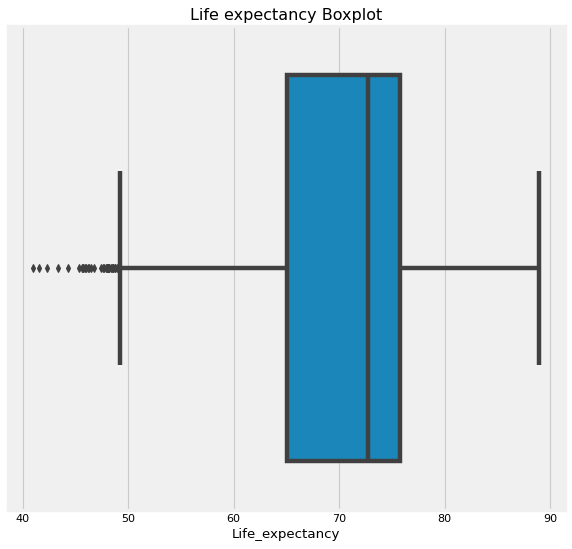

In [215]:
# Let's check the distribution of y variable (Life Expectancy)
plt.figure(figsize=(8,8), dpi= 80)
sns.boxplot(df_without_outliers['Life_expectancy'])
plt.title('Life expectancy Boxplot')
plt.show()

[]

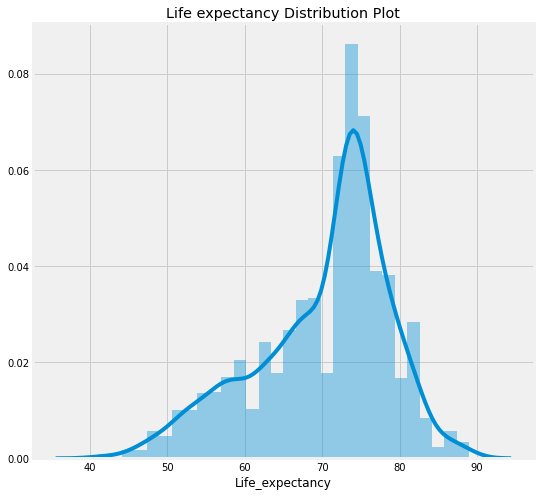

In [216]:
plt.figure(figsize=(8,8))
plt.title('Life expectancy Distribution Plot')
sns.distplot(df_without_outliers['Life_expectancy'])
plt.plot()

In [217]:
num_col = df_without_outliers.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df_without_outliers.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Year', 'Status', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index([], dtype='object')


# Check the correlation between all columns

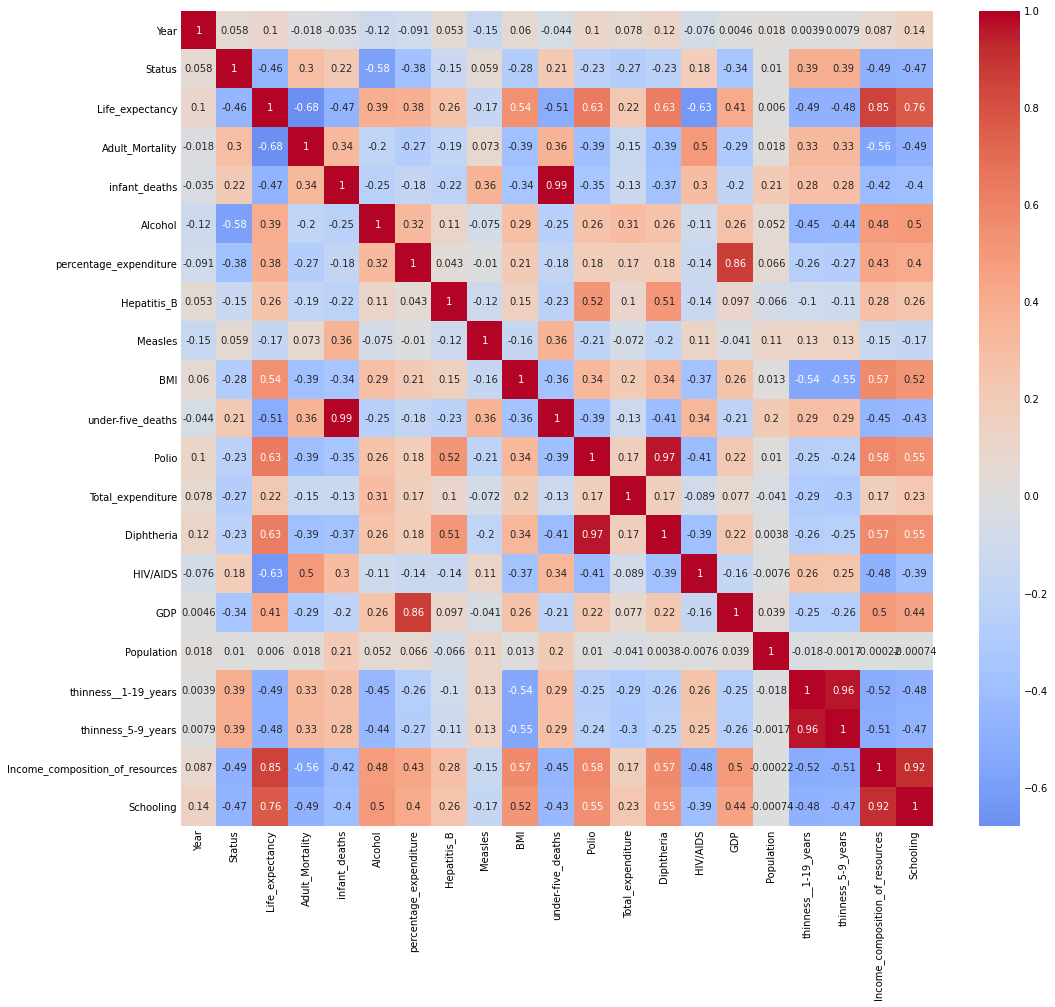

In [218]:
# Let's check the multicollinearity of features by checking the correlation matrix
plt.figure(figsize=(15,15))
p=sns.heatmap(df_without_outliers[num_col].corr(), annot=True,cmap='coolwarm',center=0)

# Check the linearity of Life_expectancy with the 3 most correlated

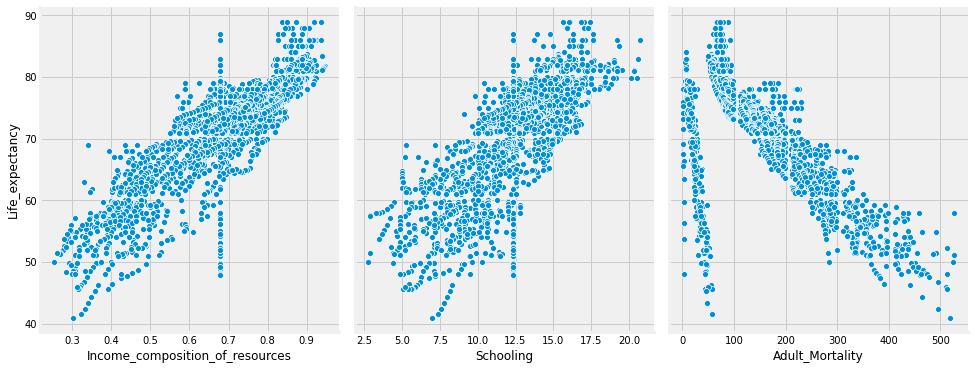

In [231]:
sns.pairplot(df_without_outliers, x_vars=['Income_composition_of_resources','Schooling','Adult_Mortality'], y_vars='Life_expectancy', size=5, aspect=0.9)

# Prepare 70% of the data to train and 30% for test

In [296]:
# Train test split
X=df_without_outliers.drop(columns=['Life_expectancy'])
y=df_without_outliers[['Life_expectancy']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)

# Linear regression model

In [297]:
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [298]:
#Training score
r_sq = regr.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8448271487994308


In [299]:
#Test scores

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[ 5.61623537e-02 -1.55686841e+00 -1.42337090e-02  7.61590677e-02
  -6.80885030e-02  6.64575241e-04 -2.95287501e-02  1.30724228e-05
   4.56946261e-03 -7.20291092e-02  4.72816997e-02  1.77357460e-01
   5.02768456e-02 -6.45308838e-01 -7.02331181e-05  1.41683726e-08
   1.38577819e-02 -1.03493082e-01  3.40589065e+01 -3.74724450e-01]]
Mean squared error: 9.90
Coefficient of determination: 0.87


In [300]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [301]:
print('MAPE value: ' + str(mean_absolute_percentage_error(y_test, y_pred)))

MAPE value: 3.338043417452293


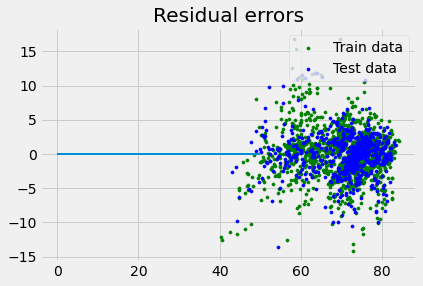

In [302]:
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(regr.predict(X_train), regr.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(regr.predict(X_test), regr.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

# Check if the results of training and prediction are a normal distribution

In [303]:
test_prediction = pd.DataFrame(y_pred, columns=['y_pred']) 

Text(0.5, 0, 'Errors')

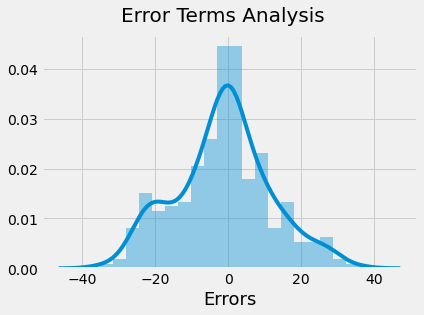

In [304]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train['Life_expectancy'] - test_prediction['y_pred']), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [315]:
X_train.columns

Index(['Year', 'Status', 'Adult_Mortality', 'infant_deaths', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

# Selecting the best features according to RFE

In [351]:
# Running RFE with important column count to be 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

/home/thais/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [352]:
list(zip(X_train.columns,rfe.ranking_))

[('Year', 1),
 ('Status', 1),
 ('Adult_Mortality', 1),
 ('infant_deaths', 1),
 ('Alcohol', 1),
 ('percentage_expenditure', 3),
 ('Hepatitis_B', 1),
 ('Measles', 5),
 ('BMI', 2),
 ('under-five_deaths', 1),
 ('Polio', 1),
 ('Total_expenditure', 1),
 ('Diphtheria', 1),
 ('HIV/AIDS', 1),
 ('GDP', 4),
 ('Population', 6),
 ('thinness__1-19_years', 1),
 ('thinness_5-9_years', 1),
 ('Income_composition_of_resources', 1),
 ('Schooling', 1)]

In [353]:
# Selecting the important features (in the support)
imp_columns = X_train.columns[rfe.support_]
imp_columns

Index(['Year', 'Status', 'Adult_Mortality', 'infant_deaths', 'Alcohol',
       'Hepatitis_B', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'thinness__1-19_years', 'thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [354]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[imp_columns]

In [355]:
# Creating X_test dataframe with RFE selected variables
X_test_rfe = X_test[imp_columns]

In [356]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_rfe, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test_rfe)

#Training score
r_sq = regr.score(X_train_rfe, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8426596375820818


In [357]:
# Test scores

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[ 4.23341802e-02 -1.61830453e+00 -1.44507866e-02  7.88053534e-02
  -5.15742000e-02 -3.40646610e-02 -7.21224651e-02  4.51736919e-02
   1.97333858e-01  5.41574104e-02 -6.53378255e-01 -7.27356802e-03
  -9.36522755e-02  3.35082870e+01 -3.46015611e-01]]
Mean squared error: 9.88
Coefficient of determination: 0.87


In [358]:
mean_absolute_percentage_error(y_test, y_pred)

3.3530875280568715

# Calculate Variance Inflation Factor 

In [359]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Polio,569.82
9,Diphtheria,529.43
13,Income_composition_of_resources,180.23
0,Year,150.65
14,Schooling,134.54
6,under-five_deaths,84.02
3,infant_deaths,80.48
5,Hepatitis_B,61.17
11,thinness__1-19_years,37.54
12,thinness_5-9_years,36.63


In [361]:
# Dropping insignificant variable
X_train_rfe2 = X_train_rfe.drop('Polio', 1,)
X_test_rfe2 = X_test_rfe.drop('Polio', 1,)

In [362]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_rfe2, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test_rfe2)


#Training score
r_sq = regr.score(X_train_rfe2, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8422657759673292


In [363]:
# Test scores

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[ 4.05028819e-02 -1.58613208e+00 -1.45521470e-02  7.74960045e-02
  -4.95125206e-02 -3.26274640e-02 -7.06514540e-02  1.99070043e-01
   9.43871983e-02 -6.63929502e-01  2.00276922e-03 -1.00031767e-01
   3.36810071e+01 -3.45934145e-01]]
Mean squared error: 9.85
Coefficient of determination: 0.87


In [364]:
mean_absolute_percentage_error(y_test, y_pred)

3.335576750076015

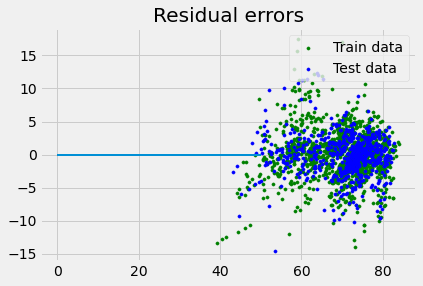

In [366]:
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(regr.predict(X_train_rfe2), regr.predict(X_train_rfe2) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(regr.predict(X_test_rfe2), regr.predict(X_test_rfe2) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

# Check if the results of training and prediction are a normal distribution

In [367]:
test_prediction = pd.DataFrame(y_pred, columns=['y_pred']) 

Text(0.5, 0, 'Errors')

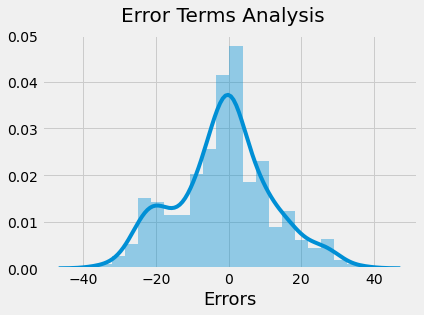

In [368]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train['Life_expectancy'] - test_prediction['y_pred']), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)